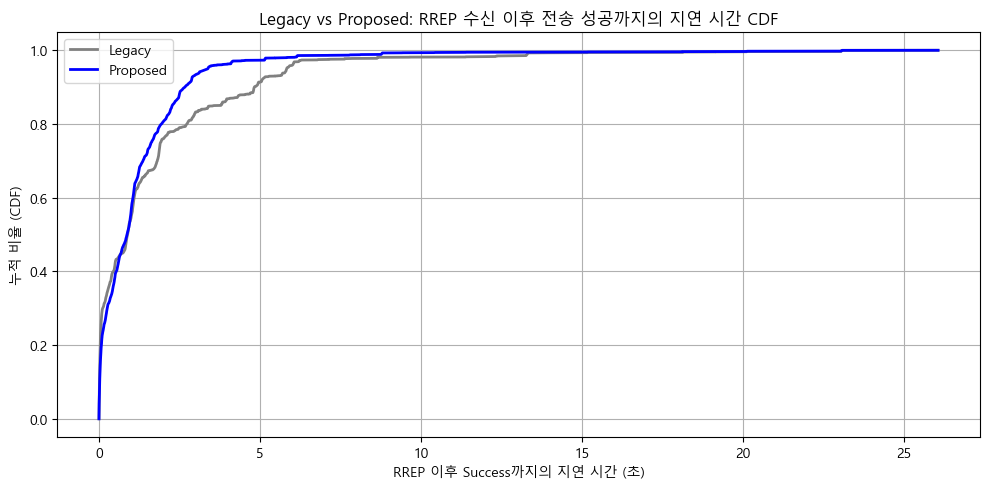

In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
density = "D400"
speed = "S30"
nodes = ["N0","N4", "N6", "N9", "N10", "N11", "N17", "N22", "N29"]
time_range = (30.0, 99.0)

def extract_event_times(filepath, sep=":", col=0):
    times = []
    if not os.path.isfile(filepath): return times
    with open(filepath) as f:
        for line in f:
            try:
                t = float(line.strip().split(sep)[col])
                if time_range[0] <= t <= time_range[1]:
                    times.append(t)
            except: continue
    return sorted(times)

def collect_delay_deltas(base_dir):
    deltas = []
    for node in nodes:
        node_path = os.path.join(base_dir, node)
        success_times = extract_event_times(os.path.join(node_path, "success_app.txt"), sep=":", col=0)
        rrep_times = []

        rec_file = os.path.join(node_path, "recovery_log.csv")
        if os.path.isfile(rec_file):
            with open(rec_file) as f:
                for line in f:
                    parts = line.strip().split(",")
                    try:
                        t = float(parts[0])
                        event = parts[-1]
                        if time_range[0] <= t <= time_range[1] and event == "RREP_RECV":
                            rrep_times.append(t)
                    except: continue

        for r in rrep_times:
            after_success = [s for s in success_times if s > r]
            if after_success:
                delta = after_success[0] - r
                deltas.append(delta)
    return np.array(deltas)

proposed_deltas = collect_delay_deltas(os.path.join(base_path, "P", density, speed))
legacy_deltas = collect_delay_deltas(os.path.join(base_path, "L", density, speed))

def compute_cdf(values):
    values = np.sort(values)
    cdf = np.arange(1, len(values) + 1) / len(values)
    return values, cdf

x_p, y_p = compute_cdf(proposed_deltas)
x_l, y_l = compute_cdf(legacy_deltas)

plt.figure(figsize=(10, 5))
plt.plot(x_l, y_l, label="Legacy", color="gray", linewidth=2)
plt.plot(x_p, y_p, label="Proposed", color="blue", linewidth=2)
plt.xlabel("RREP 이후 Success까지의 지연 시간 (초)")
plt.ylabel("누적 비율 (CDF)")
plt.title("Legacy vs Proposed: RREP 수신 이후 전송 성공까지의 지연 시간 CDF")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


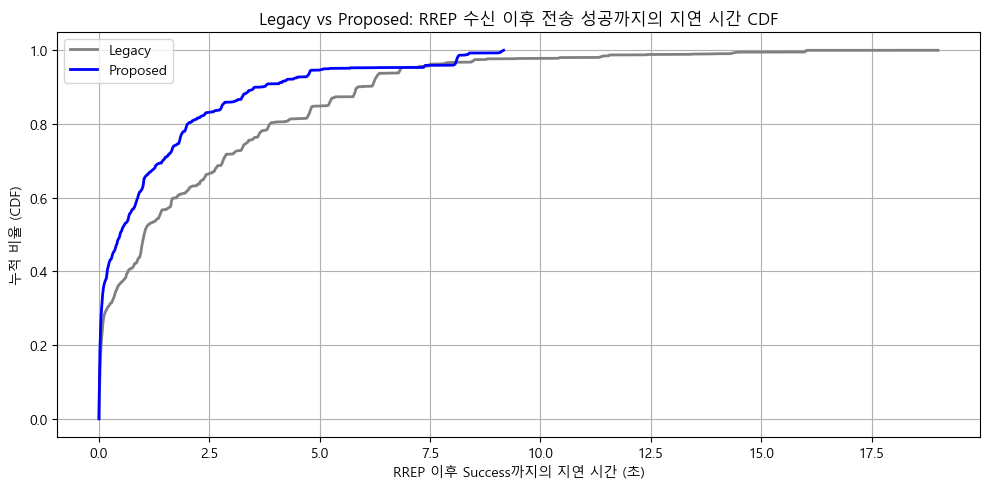

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
density = "D400"
speed = "S20"
nodes = ["N0","N4", "N6", "N9", "N10", "N11", "N17", "N22", "N29"]
time_range = (30.0, 99.0)

def extract_event_times(filepath, sep=":", col=0):
    times = []
    if not os.path.isfile(filepath): return times
    with open(filepath) as f:
        for line in f:
            try:
                t = float(line.strip().split(sep)[col])
                if time_range[0] <= t <= time_range[1]:
                    times.append(t)
            except: continue
    return sorted(times)

def collect_delay_deltas(base_dir):
    deltas = []
    for node in nodes:
        node_path = os.path.join(base_dir, node)
        success_times = extract_event_times(os.path.join(node_path, "success_app.txt"), sep=":", col=0)
        rrep_times = []

        rec_file = os.path.join(node_path, "recovery_log.csv")
        if os.path.isfile(rec_file):
            with open(rec_file) as f:
                for line in f:
                    parts = line.strip().split(",")
                    try:
                        t = float(parts[0])
                        event = parts[-1]
                        if time_range[0] <= t <= time_range[1] and event == "RREP_RECV":
                            rrep_times.append(t)
                    except: continue

        for r in rrep_times:
            after_success = [s for s in success_times if s > r]
            if after_success:
                delta = after_success[0] - r
                deltas.append(delta)
    return np.array(deltas)

proposed_deltas = collect_delay_deltas(os.path.join(base_path, "P", density, speed))
legacy_deltas = collect_delay_deltas(os.path.join(base_path, "L", density, speed))

def compute_cdf(values):
    values = np.sort(values)
    cdf = np.arange(1, len(values) + 1) / len(values)
    return values, cdf

x_p, y_p = compute_cdf(proposed_deltas)
x_l, y_l = compute_cdf(legacy_deltas)

plt.figure(figsize=(10, 5))
plt.plot(x_l, y_l, label="Legacy", color="gray", linewidth=2)
plt.plot(x_p, y_p, label="Proposed", color="blue", linewidth=2)
plt.xlabel("RREP 이후 Success까지의 지연 시간 (초)")
plt.ylabel("누적 비율 (CDF)")
plt.title("Legacy vs Proposed: RREP 수신 이후 전송 성공까지의 지연 시간 CDF")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


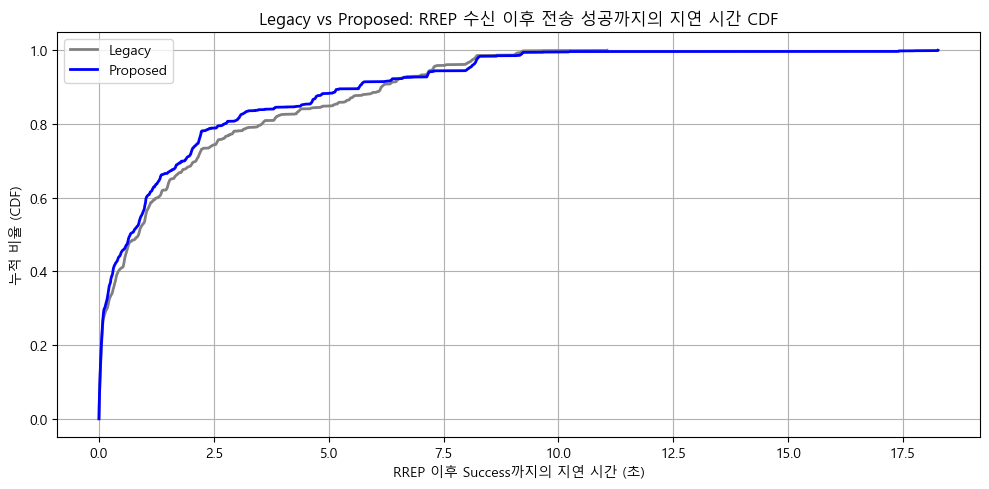

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
density = "D400"
speed = "S10"
nodes = ["N0","N4", "N6", "N9", "N10", "N11", "N17", "N22", "N29"]
time_range = (30.0, 99.0)

def extract_event_times(filepath, sep=":", col=0):
    times = []
    if not os.path.isfile(filepath): return times
    with open(filepath) as f:
        for line in f:
            try:
                t = float(line.strip().split(sep)[col])
                if time_range[0] <= t <= time_range[1]:
                    times.append(t)
            except: continue
    return sorted(times)

def collect_delay_deltas(base_dir):
    deltas = []
    for node in nodes:
        node_path = os.path.join(base_dir, node)
        success_times = extract_event_times(os.path.join(node_path, "success_app.txt"), sep=":", col=0)
        rrep_times = []

        rec_file = os.path.join(node_path, "recovery_log.csv")
        if os.path.isfile(rec_file):
            with open(rec_file) as f:
                for line in f:
                    parts = line.strip().split(",")
                    try:
                        t = float(parts[0])
                        event = parts[-1]
                        if time_range[0] <= t <= time_range[1] and event == "RREP_RECV":
                            rrep_times.append(t)
                    except: continue

        for r in rrep_times:
            after_success = [s for s in success_times if s > r]
            if after_success:
                delta = after_success[0] - r
                deltas.append(delta)
    return np.array(deltas)

proposed_deltas = collect_delay_deltas(os.path.join(base_path, "P", density, speed))
legacy_deltas = collect_delay_deltas(os.path.join(base_path, "L", density, speed))

def compute_cdf(values):
    values = np.sort(values)
    cdf = np.arange(1, len(values) + 1) / len(values)
    return values, cdf

x_p, y_p = compute_cdf(proposed_deltas)
x_l, y_l = compute_cdf(legacy_deltas)

plt.figure(figsize=(10, 5))
plt.plot(x_l, y_l, label="Legacy", color="gray", linewidth=2)
plt.plot(x_p, y_p, label="Proposed", color="blue", linewidth=2)
plt.xlabel("RREP 이후 Success까지의 지연 시간 (초)")
plt.ylabel("누적 비율 (CDF)")
plt.title("Legacy vs Proposed: RREP 수신 이후 전송 성공까지의 지연 시간 CDF")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


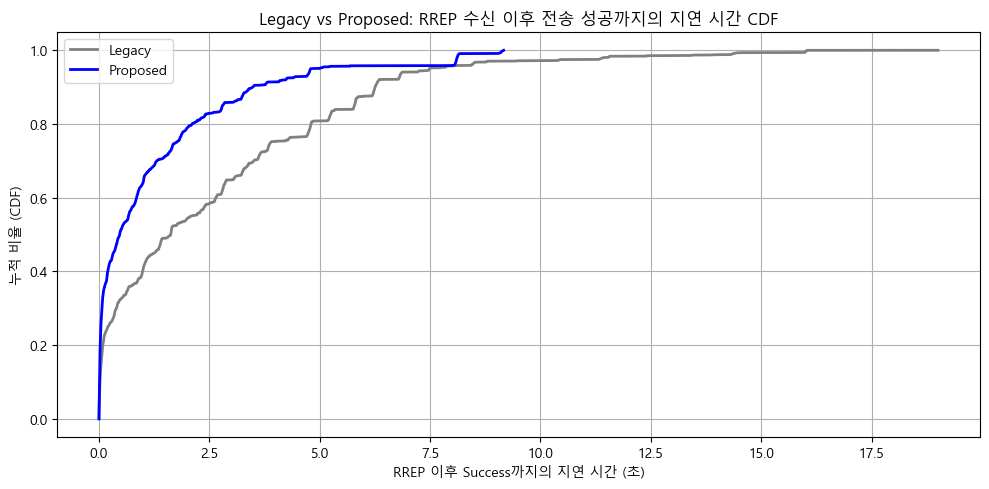

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
density = "D400"
speed = "S20"
nodes = ["N0", "N9", "N17", "N22", "N29"]
time_range = (30.0, 99.0)

def extract_event_times(filepath, sep=":", col=0):
    times = []
    if not os.path.isfile(filepath): return times
    with open(filepath) as f:
        for line in f:
            try:
                t = float(line.strip().split(sep)[col])
                if time_range[0] <= t <= time_range[1]:
                    times.append(t)
            except: continue
    return sorted(times)

def collect_delay_deltas(base_dir):
    deltas = []
    for node in nodes:
        node_path = os.path.join(base_dir, node)
        success_times = extract_event_times(os.path.join(node_path, "success_app.txt"), sep=":", col=0)
        rrep_times = []

        rec_file = os.path.join(node_path, "recovery_log.csv")
        if os.path.isfile(rec_file):
            with open(rec_file) as f:
                for line in f:
                    parts = line.strip().split(",")
                    try:
                        t = float(parts[0])
                        event = parts[-1]
                        if time_range[0] <= t <= time_range[1] and event == "RREP_RECV":
                            rrep_times.append(t)
                    except: continue

        for r in rrep_times:
            after_success = [s for s in success_times if s > r]
            if after_success:
                delta = after_success[0] - r
                deltas.append(delta)
    return np.array(deltas)

proposed_deltas = collect_delay_deltas(os.path.join(base_path, "P", density, speed))
legacy_deltas = collect_delay_deltas(os.path.join(base_path, "L", density, speed))

def compute_cdf(values):
    values = np.sort(values)
    cdf = np.arange(1, len(values) + 1) / len(values)
    return values, cdf

x_p, y_p = compute_cdf(proposed_deltas)
x_l, y_l = compute_cdf(legacy_deltas)

plt.figure(figsize=(10, 5))
plt.plot(x_l, y_l, label="Legacy", color="gray", linewidth=2)
plt.plot(x_p, y_p, label="Proposed", color="blue", linewidth=2)
plt.xlabel("RREP 이후 Success까지의 지연 시간 (초)")
plt.ylabel("누적 비율 (CDF)")
plt.title("Legacy vs Proposed: RREP 수신 이후 전송 성공까지의 지연 시간 CDF")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
